<a href="https://colab.research.google.com/github/srujanreddy09/Natural_Language_Processing/blob/master/Imdb_Sentiment_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Modules**

In [1]:
import numpy as np
from tensorflow import keras
from keras.layers import Dense, Dropout, Conv1D, Embedding, GlobalAveragePooling1D
from keras.models import Sequential
from keras import regularizers
from keras.callbacks import EarlyStopping
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

Using TensorFlow backend.


## **Helper Function**

In [2]:
# For plotting accuracy during training phase
def accuracy_plotter(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    plt.clf()

# For plotting loss during training phase
def loss_plotter(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    plt.clf()

## **Setting Parameter**

In [3]:
# Number of most common words to use in the IMDB dataset
num_words = 10000
# Number of epochs
nb_epochs = 25

## **Loading the Data**

In [4]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = num_words)

In [5]:
data = np.concatenate((x_train, x_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

## **Data Analysis**

In [6]:
print("All categories of sentiment", np.unique(targets))

All categories of sentiment [0 1]


In [7]:
print("Number of unique words:", len(np.unique(np.hstack(data))))

Number of unique words: 9998


In [8]:
print("Average length of a sentence", np.mean([len(i) for i in data]))

Average length of a sentence 234.75892


In [9]:
print("Max length of a sentence : ", np.max([len(i) for i in data]))

Max length of a sentence :  2494


## **Data Preprocessing**

In [10]:
# Padding the sequences to be of the same lenght - 500
data = pad_sequences(data, maxlen=500)

In [11]:
targets = np.array(targets).astype("float32")

In [12]:

x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size=0.3, random_state=42)

## **Model Architecture**

In [13]:
model = Sequential(name = "Sequential_Model")
model.add(Embedding(num_words, 32, input_length = 500, name = "Embedding_Layer"))
model.add(Conv1D(filters = 32, kernel_size = 3, padding = "same", name = "Conv1D"))
model.add(Dropout(0.5, name = "DO_1"))
model.add(GlobalAveragePooling1D(name = "Glob_Avg_Pool"))
model.add(Dense(16, activation="relu", name = "Dense_1", kernel_regularizer=regularizers.l2(0.005)))
model.add(Dropout(0.5, name = "DO_2"))
model.add(Dense(1, name = "Output_layer", activation = "sigmoid"))

In [14]:
model.summary()

Model: "Sequential_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Embedding_Layer (Embedding)  (None, 500, 32)           320000    
_________________________________________________________________
Conv1D (Conv1D)              (None, 500, 32)           3104      
_________________________________________________________________
DO_1 (Dropout)               (None, 500, 32)           0         
_________________________________________________________________
Glob_Avg_Pool (GlobalAverage (None, 32)                0         
_________________________________________________________________
Dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
DO_2 (Dropout)               (None, 16)                0         
_________________________________________________________________
Output_layer (Dense)         (None, 1)            

In [15]:
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])

## **Training the Model**

In [16]:
# Early Stopping to prevent overfitting
early_stop = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

In [17]:
# Fitting the Model
history = model.fit(x_train, y_train, validation_split=0.3, shuffle=True, epochs = nb_epochs, callbacks=[early_stop])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 24500 samples, validate on 10500 samples
Epoch 1/25
24500/24500 [==============================] - 8s 315us/step - loss: 0.5392 - accuracy: 0.7412 - val_loss: 0.3297 - val_accuracy: 0.8835
Epoch 2/25
24500/24500 [==============================] - 6s 257us/step - loss: 0.3044 - accuracy: 0.8977 - val_loss: 0.2994 - val_accuracy: 0.8851
Epoch 3/25
24500/24500 [==============================] - 6s 264us/step - loss: 0.2525 - accuracy: 0.9184 - val_loss: 0.2982 - val_accuracy: 0.8909
Epoch 4/25
24500/24500 [==============================] - 6s 258us/step - loss: 0.2171 - accuracy: 0.9333 - val_loss: 0.3326 - val_accuracy: 0.8788
Epoch 5/25
24500/24500 [==============================] - 6s 262us/step - loss: 0.1883 - accuracy: 0.9451 - val_loss: 0.3705 - val_accuracy: 0.8753
Epoch 6/25
24500/24500 [==============================] - 6s 256us/step - loss: 0.1722 - accuracy: 0.9508 - val_loss: 0.3542 - val_accuracy: 0.8818


## **Accuracy and Loss values during the training phase**

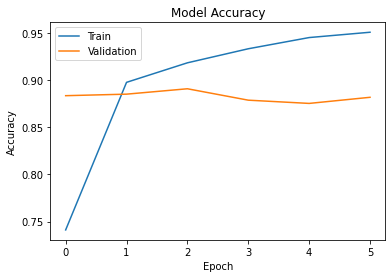

<Figure size 432x288 with 0 Axes>

In [18]:
# Train and Validation accuracy vs Epochs
accuracy_plotter(history)

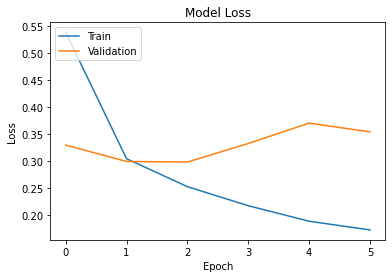

<Figure size 432x288 with 0 Axes>

In [19]:
# Train and Validation loss vs Epochs
loss_plotter(history)

## **Evaluating the model on test data**

In [20]:
_, acc = model.evaluate(x_test, y_test)
print("Accuracy on test set :", round(acc*100, 3))

15000/15000 [==============================] - 1s 81us/step
Accuracy on test set : 89.58
